In [79]:
# Load needed modules
import numpy as np
import matplotlib.pyplot as plt 
import math

In [80]:
#  LLSE(X,Y) produces the LLSE estimate Xhat of X from Y as well as the mean-squared error MSE
#  and the coefficient of determination R2.

#9.6 (a) Complete the function LLSE to compute the LLSE estimate of X given data samples in the matrix Y

def LLSE(X, Y):
    XYstack = np.column_stack((X, Y)) #concatenate X and Y into a matrix with X as its first column

    # Fill in the following:  
    #   Compute the average of XYstack, 
    #   set the first element of XYstack as mean of X, muX
    #   set the remaining elements of XY stack as the mean vector of Y, muY
    #   Compute the covariance matrix of XYstack.  This covariance will have the shape 
    #   [SigmaX   SigmaXY] in the first row, where SigmaX is the scalar variance of X and SigmaXY
    #   is the cross covariance between X and Y. 
    #   The rest of rows of the covariance matrix have SigmaYX as the first column, and SigmaY as the rest of the columhs. 
    #   Store the appropriate elements from the computed covariance into SigmaX, SigmaXY, and SigmaY
    meanstack = np.mean(XYstack, axis=0)    #mean of X and Y
    covstack = np.cov(XYstack, rowvar=False)     #covariance of X and Y
    muX = meanstack[0]          #extract mean of X from meanstack
    muY = meanstack[1:]          #extract mean of Y from meanstack 
    sigmaXY = covstack[0, 1:]      #extract cross-covariance matrix of X and Y
    sigmaY = covstack[1:, 1:]      #extract covariance matrix of Y
    sigmaX = covstack[0, 0]       #extract variance of X

    # Using the above vectors and matrices, for each row j of Y, use the LLSE estimation formula for predicting 
    # Xhat[j] using the LLSE estimation formulas with the vectors and matrices indicated above.
    ndata = Y.shape[0]
    xhat = np.zeros((ndata,))
    sigmaYinv = np.linalg.inv(sigmaY) # always do the inverses outside the loops
    yvector = Y[0,:]
    for j in range(ndata):
        yvector = Y[j,:]
        xhat[j] = muX + (sigmaXY@sigmaYinv)@(yvector - muY)    ### use the LLSE estimate to compute this
    
    # Compute the theoretical LLSE mean squared error using the LLSE error formula:
    sigmaXYtransposed = covstack[1:, 0] #sigmaXY.transpose()
    sigmaE = sigmaX - (sigmaXY@np.linalg.inv(sigmaY)@sigmaXYtransposed)      ## Fill this 

    return xhat, sigmaE

In [81]:
# 9.6 (b)  Compute the empirical performance of the LLSE Estimator from the data and estimates

def ComputePerformance(X, Xhat):
    ndata = X.shape[0]
    muX = np.mean(X)

    #Your code for calculating the mean-squared error between X and Xhat
    sum = 0.
    for ii in range(ndata):
        sum += ((X[ii]-Xhat[ii]) ** 2.)
    MSE = (1./ndata) * sum
    
    #Your code for calculating the coefficient of determination between X and Xhat.
    sum = 0.
    for ii in range(ndata):
        sum += ((X[ii]-muX) ** 2.)
    denom = (1./ndata) * sum
    R2 = 1. - (MSE/denom) 

    return MSE, R2

In [82]:
#Homework 9 Python Solution: Read the data

data = np.genfromtxt("concretedata.csv", delimiter = ",")
X = data[1:,8]
nx = X.shape[0]
Y = data[1:,0:8]
ny,dy = Y.shape

Vector LLSE prediction attains theoretical MSE = 107.30141220321266, MSE = 107.19723607486019, and R2 = 0.6155198704142721.


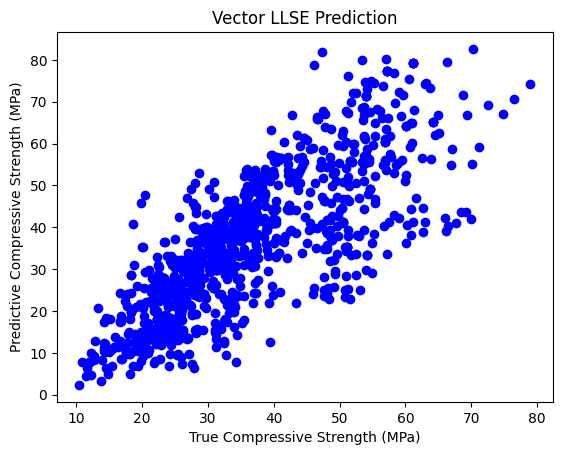

In [83]:
# 9.6 (c) Find the best vector fit

vectorXhat, vectorSigmaE = LLSE(X, Y)
vectorMSE, vectorR2 = ComputePerformance(X, vectorXhat)

print(f"Vector LLSE prediction attains theoretical MSE = {vectorSigmaE}, MSE = {vectorMSE}, and R2 = {vectorR2}.")

## Scatter plot the required data and label the plot and the two axes below...
fig = plt.figure()
plt.scatter(vectorXhat, X, color='b')
plt.xlabel('True Compressive Strength (MPa)')
plt.ylabel('Predictive Compressive Strength (MPa)')
plt.title('Vector LLSE Prediction')
plt.show()
fig.savefig('part_c.png')

Vector LLSE prediction attains theoretical MSE = 166.57286880801084, MSE = 166.41114757615838, and R2 = 0.40313965240754923.


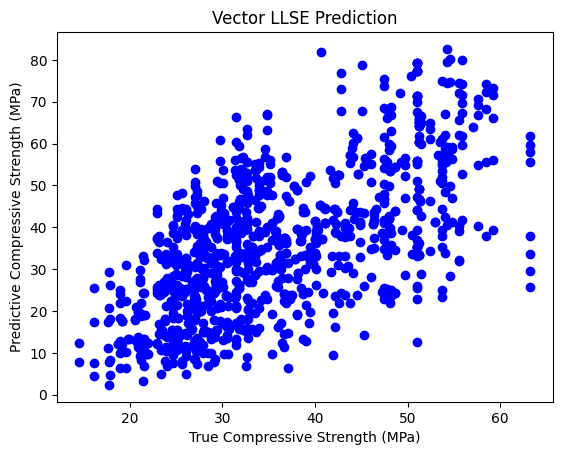

In [84]:
# 9.6 (d) Find the best fit with only the first 3 columns of Y

vectorXhat, vectorSigmaE = LLSE(X, Y[:,0:3])
vectorMSE, vectorR2 = ComputePerformance(X, vectorXhat)

print(f"Vector LLSE prediction attains theoretical MSE = {vectorSigmaE}, MSE = {vectorMSE}, and R2 = {vectorR2}.")

fig = plt.figure()
plt.scatter(vectorXhat, X, color='b')
plt.xlabel('True Compressive Strength (MPa)')
plt.ylabel('Predictive Compressive Strength (MPa)')
plt.title('Vector LLSE Prediction')
plt.show()
fig.savefig('part_d.png')

Vector LLSE prediction attains theoretical MSE = 63.00867330017962, MSE = 62.94749983094031, and R2 = 0.7742286669108126.


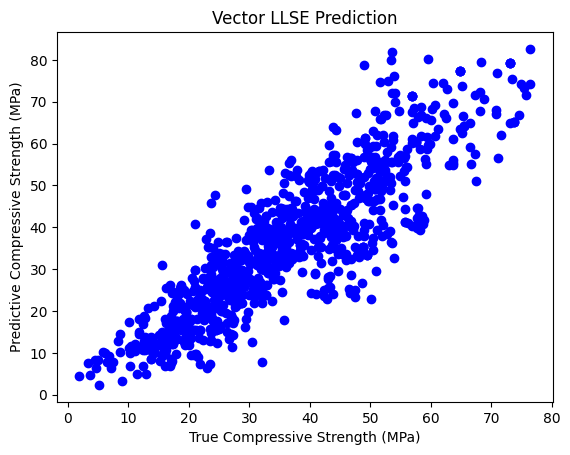

This is definitely a better fit to the data than my linear fit from part d as the theoretical and empirical MSE are both lower, and the R^2 is higher than before. Just visually, I can also see that it is closer to a line than before.


In [85]:
# 9.6 (e) Find the best fit nonlinear fit with quadratic augmentation of data 

Yaug = np.column_stack((Y, Y**2))
vectorXhat, vectorSigmaE = LLSE(X, Yaug)
vectorMSE, vectorR2 = ComputePerformance(X, vectorXhat)

print(f"Vector LLSE prediction attains theoretical MSE = {vectorSigmaE}, MSE = {vectorMSE}, and R2 = {vectorR2}.")

fig = plt.figure()
plt.scatter(vectorXhat, X, color='b')
plt.xlabel('True Compressive Strength (MPa)')
plt.ylabel('Predictive Compressive Strength (MPa)')
plt.title('Vector LLSE Prediction')
plt.show()
fig.savefig('part_e.png')

print("This is definitely a better fit to the data than my linear fit from part d as the theoretical and empirical MSE are both lower, and the R^2 is higher than before. Just visually, I can also see that it is closer to a line than before.")